# Question 1) Part 5:
In this part implement regression with k-fold cross validation. Analyse how behavior changes with different values of k. Also implement a variant of this which is the
leave-one-out cross validation.

In [57]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

Read the data set, drop serial number and chance of admit from it and add column of all 1's. Create initial theta of size 8 (7 coulumns + 1 for interceot), initialized by all zeros.

In [58]:
filename="./AdmissionDataset/data.csv"
data = pd.read_csv(filename)
# data = data.sample(frac=1)

def normalise(data,columns):
    for i in columns:
        mean=data[i].mean()
        std=data[i].std()
        data[i]=(data[i]-mean)/std
    return data

columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR ' ,'CGPA','Research']
data=normalise(data,columns)
data.insert(0,'all_ones',1)
data=data.drop(['Serial No.'],axis=1)

Y=data['Chance of Admit ']
data=data.drop(['Chance of Admit '],axis=1)
data=np.array(data)
print(np.shape(data))

(450, 8)


In [59]:
alpha=0.01
theta=np.zeros(8)#7 for columns + 1 for beta0
lambda_val=0.001

Gradient decent over ridge regression

In [60]:
def gradientDescent_ridge(x,yactual,theta,alpha,lambda_val):
    num_of_rows,cols=np.shape(x)
    col_length=np.shape(theta)
    x=np.array(x)
    for i in range(0,1000):
        pred=np.dot(x,theta.T)
        loss_value = pred - yactual
        gradient_0=np.sum(np.dot(x[:,0],loss_value))
        theta[0]=theta[0]-(alpha*(gradient_0/num_of_rows))
        for j in range(1,col_length[0]):
            gradient=np.sum(np.dot(x[:,j],loss_value))
            lamda_part=(2*lambda_val*theta[j]) #differentiation of square of theta[j]
            theta[j]=theta[j] - (alpha * ((gradient+lamda_part)/(num_of_rows)))
    return theta

For each value of k in the range 2 to 40, call gradient decent, find the theta, and hence find the error.

In [64]:
k_list=[]
error_list=[]
for k in range(2,41):
    kf = KFold(n_splits=k)
    error_mean=[]
    for train_index,test_index in kf.split(data):
        X_train,X_test = data[train_index],data[test_index]
        Y_train,Y_test = Y[train_index],Y[test_index]
        theta_temp=gradientDescent_ridge(X_train,Y_train,theta,alpha,lambda_val)
        pred=np.dot(theta_temp,X_test.T)
        loss= np.sum(np.square(pred-Y_test))/(np.shape(X_test)[0])
        error_mean.append(loss)
    error_mean=np.array(error_mean)
    mean_loss=np.mean(error_mean)
    print(k,mean_loss)
    k_list.append(k)
    error_list.append(mean_loss)

2 0.003853998533229463
3 0.003815491575740427
4 0.003757390447405192
5 0.0037702544368199836
6 0.0037533689775596196
7 0.003756822277147607
8 0.0037534870590793584
9 0.003757762458077998
10 0.003776023688527374
11 0.003757080213030393
12 0.0037451959386410453
13 0.0037286362134804026
14 0.003751562978375518
15 0.00375153371835247
16 0.0037577244543514224
17 0.0037470229602966755
18 0.0037519379975352787
19 0.003767489301492647
20 0.0037575907784021373
21 0.003777388019342934
22 0.0037597288519584287
23 0.003762769848317175
24 0.0037582598941672137
25 0.003756622246049317
26 0.003748162839900337
27 0.003766099743963994
28 0.003764612274598174
29 0.0037423655869091134
30 0.003762833374455783
31 0.003760713552032722
32 0.003768728620147305
33 0.0037578253530309836
34 0.0037475789140569817
35 0.003760388153305762
36 0.003767842523629758
37 0.003754278004661539
38 0.003760531509209455
39 0.0037546842039390812
40 0.0037467140386774267


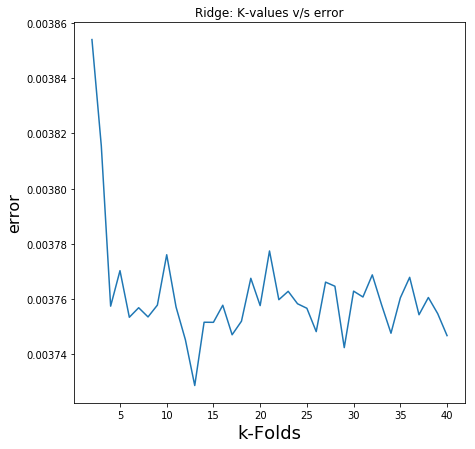

In [67]:
plt.figure(figsize=(7,7))
plt.title('Ridge: K-values v/s error')
plt.xlabel('k-Folds', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.plot(k_list,error_list)


# Observation

As the value of K increases, the error decreases.
But after certain k value, the error tends to increase, as now increasing k reduces the number of data samples in each section, hence overfitting is observed.

# leave-one-out cross validation.

In [69]:
kf = KFold(n_splits=np.shape(X_test)[0])
error_mean=[]
for train_index,test_index in kf.split(data):
    X_train,X_test = data[train_index],data[test_index]
    Y_train,Y_test = Y[train_index],Y[test_index]
    theta_temp=gradientDescent_ridge(X_train,Y_train,theta,alpha,lambda_val)
    pred=np.dot(theta_temp,X_test.T)
    loss= np.sum(np.square(pred-Y_test))/(2*np.shape(X_test)[0])
    error_mean.append(loss)
error_mean=np.array(error_mean)
mean_loss=np.mean(error_mean)
print("LOOCV Error: ",mean_loss)

LOOCV Error:  0.0018785453130037001
